# Sentiment Analysis Methodology

## Install Vertex AI SDK

In [ ]:
%%capture
!pip install google-cloud-aiplatform --upgrade --user

In [ ]:
# # Automatically restart kernel after installs so that your environment can access the new packages
import IPython

app = IPython.Application.instance()
app.kernel.do_shutdown(True)

{'status': 'ok', 'restart': True}

## Authenticating your notebook environment

In [ ]:
from google.colab import auth

auth.authenticate_user()

## Initialize the Vertex AI SDK

In [ ]:
import vertexai

PROJECT_ID = "stalwart-summer-413911"  # @param {type:"string"}
location = "us-central1" # @param {type:"string"}

vertexai.init(project=PROJECT_ID, location=location)

## Import libraries

In [9]:
import pandas as pd
import numpy as np
from tqdm import tqdm

import string
import ast
import glob
import os

import plotly.graph_objects as go
from wordcloud import WordCloud
import matplotlib.pyplot as plt

In [ ]:
from vertexai.language_models import TextGenerationModel

## Import models

In [ ]:
generation_model = TextGenerationModel.from_pretrained("text-bison@001")

# Getting Started

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
path = "/content/drive/MyDrive/DS532 Text/project"

In [10]:
# Read the CSV file into a DataFrame
df = pd.read_csv(f"{path}/sentiment_for_analysis.csv")

df.head()

,reviewerID,asin,rating,reviews,sentiment,year,month,day,helpful_review
0,A1ZQZ8RJS1XVTX,0657745316,5,sugar gmo garbage fillers come store bought ex...,Very Positive,2013,10,11,0.0
1,A31W38VGZAUUM4,0700026444,5,absolute undisputed favorite tea right now lov...,Very Positive,2012,12,6,1.0
2,A3I0AV0UJX5OH0,1403796890,1,ordered spongbob slippers got john cena happy ...,Very Negative,2013,12,2,0.0
3,A3QAAOLIXKV383,1403796890,3,cart fine works purpose bought it farmerss mar...,Neutral,2011,6,12,0.0
4,AB1A5EGHHVA9M,141278509X,5,product archer farms best drink mix ever mix f...,Very Positive,2012,3,24,1.0


## Top 10 Most Reviewed Products

In [11]:
# Count occurrences of each ASIN
asin_counts = df['asin'].value_counts()

# Select top 10 most reviewed ASINs and sort them in descending order
top_10_asin = asin_counts.head(10).sort_values(ascending=False)

# Print the top 10 most reviewed products
print("Top 10 Most Reviewed Products:")
for asin, count in top_10_asin.items():
    print(f"ASIN: {asin}, Reviews: {count}")

Top 10 Most Reviewed Products:
ASIN: B0000DID5R, Reviews: 479
ASIN: 616719923X, Reviews: 278
ASIN: B00006IUTN, Reviews: 234
ASIN: B0000531B7, Reviews: 157
ASIN: B0000CFN0Y, Reviews: 147
ASIN: B0000DJT3C, Reviews: 146
ASIN: B0000DGDMO, Reviews: 137
ASIN: B0000DJDJZ, Reviews: 131
ASIN: B0000CFLIL, Reviews: 118
ASIN: B0000CFLCT, Reviews: 117


### Top 10 Most Reviewed Products by Sentiment Polarity

In [12]:
# Count occurrences of each ASIN
asin_counts = df['asin'].value_counts()

# Group by sentiment polarity and select the top 10 most reviewed ASINs for each sentiment polarity
top_10_by_sentiment = df.groupby('sentiment')['asin'].value_counts().groupby(level=0).head(10)

# Print the top 10 most reviewed products for each sentiment polarity
print("Top 10 Most Reviewed Products by Sentiment Polarity:")
for sentiment, asin_count in top_10_by_sentiment.groupby(level=0):
    print(f"\nSentiment: {sentiment}")
    for asin, count in asin_count.items():
        print(f"ASIN: {asin}, Reviews: {count}")

Top 10 Most Reviewed Products by Sentiment Polarity:

Sentiment: Neutral
ASIN: ('Neutral', '616719923X'), Reviews: 28
ASIN: ('Neutral', 'B0000DID5R'), Reviews: 20
ASIN: ('Neutral', 'B0000DJT3C'), Reviews: 16
ASIN: ('Neutral', 'B0000CETGM'), Reviews: 15
ASIN: ('Neutral', 'B0000CFN0Y'), Reviews: 11
ASIN: ('Neutral', 'B00006IUTN'), Reviews: 10
ASIN: ('Neutral', 'B000063D0D'), Reviews: 10
ASIN: ('Neutral', 'B0000DJDJZ'), Reviews: 10
ASIN: ('Neutral', 'B0000531B7'), Reviews: 9
ASIN: ('Neutral', 'B0000DGF9V'), Reviews: 9

Sentiment: Somewhat Negative
ASIN: ('Somewhat Negative', 'B0000DID5R'), Reviews: 18
ASIN: ('Somewhat Negative', '616719923X'), Reviews: 15
ASIN: ('Somewhat Negative', 'B0000DGFCO'), Reviews: 9
ASIN: ('Somewhat Negative', 'B0000537AF'), Reviews: 7
ASIN: ('Somewhat Negative', 'B0000DGDMO'), Reviews: 7
ASIN: ('Somewhat Negative', 'B0000DGF9V'), Reviews: 7
ASIN: ('Somewhat Negative', 'B0000AE5ZD'), Reviews: 6
ASIN: ('Somewhat Negative', 'B0000DIXKU'), Reviews: 6
ASIN: ('Somewha

In [ ]:
# parent_asin = 'B0000DID5R'

# prod_review_df = df[(df['asin'] == parent_asin)]
# prod_review_df.head()

,reviewerID,asin,rating,reviews,sentiment,year,month,day,helpful_review
7088,A3VW23PTRG5MFE,B0000DID5R,5,stuff peel paint hottest thing ever need put b...,Very Positive,2010,10,31,3.0
7089,A29X8BEMT9FJZT,B0000DID5R,4,think daves think excruciating hot sauces one ...,Somewhat Positive,2013,6,7,0.0
7090,ARAHDHUK75D4G,B0000DID5R,5,daaam put drop burger made explode really mi...,Very Positive,2012,9,24,0.0
7091,AJLXHWYJMN5KZ,B0000DID5R,5,reviews read like items the vaults erowid chro...,Very Positive,2011,10,13,0.0
7092,A3IVU9P52WQGIF,B0000DID5R,1,california tortilla saw stuff got put drops pr...,Very Negative,2011,10,23,6.5


# Sentiment Analysis using Prompt

In [6]:
def pos_anal_prompt(reviews):
  prompt = f"""
      You are the expert in sentiment analysis in the field of Grocery and Gourmet Food Industry.

      Your job is to predominantly extract positive_sentiment_word (w), define sentiment polarity (p), and indicate main entity (i) from a given text.

      The expected output must be represented in the format [w, p, e].
      Return [] if there is no any sentiment word in a sentence.

      The output limit at 5 [w, p, e] per text.
      Convert w, p, e to string. and make [w, p, e] as list.
      Check each element in [w, p, e], if it is empty, then discard that [w, p, e].
      If there are more than one [w, p, e] , concatenate them and separate by a comma.

      Return [] if there is no any sentiment word in a sentence.

      text : ```{reviews}```
      """

  result = generation_model.predict(prompt, temperature=0.2, max_output_tokens=256, top_k=1, top_p=0.8).text

  return result

## Positive Sentiment

In [13]:
# Filter top_10_by_sentiment for 'Very Positive' and 'Somewhat Positive' sentiments
very_positive_top = top_10_by_sentiment.loc['Very Positive']
somewhat_positive_top = top_10_by_sentiment.loc['Somewhat Positive']

# Concatenate the top 5 most reviewed products for 'Very Positive' and 'Somewhat Positive' sentiments
top_10_positive = pd.concat([very_positive_top, somewhat_positive_top])

# Convert top_10_positive Series to DataFrame
top_10_positive_df = top_10_positive.reset_index()

# Group the DataFrame by ASIN and sentiment
top_10_positive = top_10_positive_df.groupby(['asin']).sum().sort_values(by=['count'], ascending=False).head(10).reset_index()

In [14]:
top_10_positive

,asin,count
0,B0000DID5R,423
1,B00006IUTN,216
2,616719923X,215
3,B0000531B7,139
4,B0000CFN0Y,128
5,B0000CFLIL,106
6,B0000CFLCT,104
7,B0000DGDMO,101
8,B0000DJDJZ,93
9,B00005C2M2,88


In [ ]:
# Loop through each product in the DataFrame
for row_index, product in top_10_positive.iterrows():
    product_asin = product['asin']
    print(f"Analyzing >> By Product (Asin) : {product_asin}")

    # Filter the DataFrame for the current product_asin and sentiment
    prod_filt_review = df[(df['asin'] == product_asin) & (df['sentiment'].isin(['Very Positive', 'Somewhat Positive']))]

    # Define sentiments list
    sentiments = []

    # Analyze reviews and store sentiment results
    for index, row in tqdm(prod_filt_review.iterrows(), total=len(prod_filt_review), desc="Analyzing Reviews Process "):
        reviews = row['reviews']
        sentiment_result = pos_anal_prompt(reviews)
        sentiments.append(sentiment_result)

    # Define the file path
    sentiments_file_path = f"{path}/sentiment_analysis"
    save_path = f"{sentiments_file_path}/{product_asin}_positive_sentiment.txt"

    # Write sentiments list to a file
    with open(save_path, 'w') as f:
        for sentiment in sentiments:
            f.write(sentiment + '\n')

    print(f"Product sentiment result : {product_asin}")
    print(f"File saved destination : {save_path}")
    print("-----------------------------------------------------------")

Analyzing >> By Product (Asin) : B0000DID5R


Analyzing Reviews Process : 100%|██████████| 423/423 [04:11<00:00,  1.68it/s]


Product sentiment result : B0000DID5R
File saved destination : /content/drive/MyDrive/DS532 Text/project/sentiment_analysis/B0000DID5R_positive_sentiment.txt
-----------------------------------------------------------
Analyzing >> By Product (Asin) : B00006IUTN


Analyzing Reviews Process : 100%|██████████| 216/216 [01:59<00:00,  1.81it/s]


Product sentiment result : B00006IUTN
File saved destination : /content/drive/MyDrive/DS532 Text/project/sentiment_analysis/B00006IUTN_positive_sentiment.txt
-----------------------------------------------------------
Analyzing >> By Product (Asin) : 616719923X


Analyzing Reviews Process : 100%|██████████| 215/215 [02:06<00:00,  1.70it/s]


Product sentiment result : 616719923X
File saved destination : /content/drive/MyDrive/DS532 Text/project/sentiment_analysis/616719923X_positive_sentiment.txt
-----------------------------------------------------------
Analyzing >> By Product (Asin) : B0000531B7


Analyzing Reviews Process : 100%|██████████| 139/139 [01:20<00:00,  1.73it/s]


Product sentiment result : B0000531B7
File saved destination : /content/drive/MyDrive/DS532 Text/project/sentiment_analysis/B0000531B7_positive_sentiment.txt
-----------------------------------------------------------
Analyzing >> By Product (Asin) : B0000CFN0Y


Analyzing Reviews Process : 100%|██████████| 128/128 [01:13<00:00,  1.73it/s]


Product sentiment result : B0000CFN0Y
File saved destination : /content/drive/MyDrive/DS532 Text/project/sentiment_analysis/B0000CFN0Y_positive_sentiment.txt
-----------------------------------------------------------
Analyzing >> By Product (Asin) : B0000CFLIL


Analyzing Reviews Process : 100%|██████████| 106/106 [00:59<00:00,  1.78it/s]


Product sentiment result : B0000CFLIL
File saved destination : /content/drive/MyDrive/DS532 Text/project/sentiment_analysis/B0000CFLIL_positive_sentiment.txt
-----------------------------------------------------------
Analyzing >> By Product (Asin) : B0000CFLCT


Analyzing Reviews Process : 100%|██████████| 104/104 [01:01<00:00,  1.68it/s]


Product sentiment result : B0000CFLCT
File saved destination : /content/drive/MyDrive/DS532 Text/project/sentiment_analysis/B0000CFLCT_positive_sentiment.txt
-----------------------------------------------------------
Analyzing >> By Product (Asin) : B0000DGDMO


Analyzing Reviews Process : 100%|██████████| 110/110 [01:04<00:00,  1.71it/s]


Product sentiment result : B0000DGDMO
File saved destination : /content/drive/MyDrive/DS532 Text/project/sentiment_analysis/B0000DGDMO_positive_sentiment.txt
-----------------------------------------------------------
Analyzing >> By Product (Asin) : B0000DJDJZ


Analyzing Reviews Process : 100%|██████████| 105/105 [01:00<00:00,  1.74it/s]


Product sentiment result : B0000DJDJZ
File saved destination : /content/drive/MyDrive/DS532 Text/project/sentiment_analysis/B0000DJDJZ_positive_sentiment.txt
-----------------------------------------------------------
Analyzing >> By Product (Asin) : B00005C2M2


Analyzing Reviews Process : 100%|██████████| 101/101 [00:58<00:00,  1.71it/s]

Product sentiment result : B00005C2M2
File saved destination : /content/drive/MyDrive/DS532 Text/project/sentiment_analysis/B00005C2M2_positive_sentiment.txt
-----------------------------------------------------------


In [ ]:
# List of file paths (adjust the pattern to match your files)
file_paths = glob.glob("/content/drive/MyDrive/DS532 Text/project/sentiment_analysis/*_positive_sentiment.txt")

# Initialize an empty dictionary to store DataFrames
df_dict_pos = {}

# Loop over each file path
for data_p in file_paths:
    try:
        # Extract the file name without the extension to use as a key
        file_name = os.path.basename(data_p).replace('_positive_sentiment.txt', '')

        # Read the text file line by line
        with open(data_p, 'r', encoding='utf-8') as file:
            lines = file.readlines()

        # Parse each line as a list of lists
        data = []
        for line_number, line in enumerate(lines, start=1):
            try:
                data.append(ast.literal_eval(line.strip()))
            except (ValueError, SyntaxError) as ve:
                print(f"Skipping line {line_number} in {data_p} due to {type(ve).__name__}: {line.strip()} - {ve}")

        # Flatten the nested lists
        flat_data = [item for sublist in data for item in sublist]

        # Convert the flattened list into a DataFrame
        if flat_data:
            df = pd.DataFrame(flat_data, columns=['Word', 'Sentiment', 'Entity'])
            # Store the DataFrame in the dictionary
            df_dict_pos[file_name] = df
        else:
            print(f"No valid data found in file {data_p}")

    except Exception as e:
        print(f"Error processing file {data_p}: {e}")

# Example: Access the DataFrame for a specific file
for file_name, df in df_dict_pos.items():
    print(f"DataFrame for {file_name}:")
    print(df.head())
    print()  # Print a newline for better readability between outputs

Skipping line 390 in /content/drive/MyDrive/DS532 Text/project/sentiment_analysis/B0000DID5R_positive_sentiment.txt due to SyntaxError:  - invalid syntax (<unknown>, line 0)
DataFrame for B0000DID5R:
         Word Sentiment  Entity
0     hottest  positive   stuff
1  funnuclear  positive   stuff
2      flavor  positive   daves
3        heat  positive   daves
4      burger  positive  burger

DataFrame for B00006IUTN:
        Word Sentiment   Entity
0      great  positive    price
1      great  positive    price
2     better  positive   coffee
3       work  positive  brew go
4  wonderful  positive  product

DataFrame for 616719923X:
        Word Sentiment        Entity
0      great  positive     green tea
1      great  positive       quality
2       good  positive     green tea
3  delicious  positive  spin kitkats
4      great  positive  spin kitkats

DataFrame for B0000531B7:
    Word Sentiment         Entity
0  great  positive           bars
1  great  positive  gym work outs
2   love  p

In [ ]:
# Example
file_key = 'B0000DID5R'
df_dict_pos[file_key].head()

,Word,Sentiment,Entity
0,hottest,positive,stuff
1,funnuclear,positive,stuff
2,flavor,positive,daves
3,heat,positive,daves
4,burger,positive,burger


## Negative Sentiment

In [ ]:
# Filter top_10_by_sentiment for 'Very Negative' and 'Somewhat Negative' sentiments
very_negative_top = top_10_by_sentiment.loc['Very Negative']
somewhat_negative_top = top_10_by_sentiment.loc['Somewhat Negative']

# Concatenate the top 5 most reviewed products for 'Very Negative' and 'Somewhat Negative' sentiments
top_10_negative = pd.concat([very_negative_top, somewhat_negative_top])

# Convert top_10_negative Series to DataFrame
top_10_negative_df = top_10_negative.reset_index()

# Group the DataFrame by ASIN and sentiment
top_10_negative = top_10_negative_df.groupby(['asin']).sum().sort_values(by=['count'], ascending=False).head(10).reset_index()

In [ ]:
top_10_negative

,asin,count
0,B0000DID5R,36
1,616719923X,35
2,B0000DGFCO,32
3,B0000CETGM,22
4,B0000DGF9V,22
5,B0000DGDMO,20
6,B0000DG5A8,16
7,B0000DGA8P,12
8,B0000DJDJZ,12
9,B0000DGFAC,11


In [ ]:
def neg_anal_prompt(reviews):
  prompt = f"""
      You are the expert in sentiment analysis in the field of Grocery and Gourmet Food Industry.

      Your job is to predominantly extract negative_sentiment_word (w), define sentiment polarity (p), and indicate main entity (i) from a given text.

      The expected output must be represented in the format [w, p, e].
      Return [] if there is no any sentiment word in a sentence.

      The output limit at 5 [w, p, e] per text.
      Convert w, p, e to string. and make [w, p, e] as list.
      Check each element in [w, p, e], if it is empty, then discard that [w, p, e].
      If there are more than one [w, p, e] , concatenate them and separate by a comma.

      Return [] if there is no any sentiment word in a sentence.

      text : ```{reviews}```
      """

  result = generation_model.predict(prompt, temperature=0.2, max_output_tokens=256, top_k=1, top_p=0.8).text

  return result

In [ ]:
# Loop through each product in the DataFrame
for row_index, product in top_10_negative.iterrows():
    product_asin = product['asin']
    print(f"Analyzing >> By Product (Asin) : {product_asin}")

    # Filter the DataFrame for the current product_asin
    prod_filt_review = df[(df['asin'] == product_asin) & (df['sentiment'].isin(['Very Negative', 'Somewhat Negative']))]

    # Define sentiments list
    sentiments = []

    # Analyze reviews and store sentiment results
    for index, row in tqdm(prod_filt_review.iterrows(), total=len(prod_filt_review), desc="Analyzing Reviews Process "):
        reviews = row['reviews']
        sentiment_result = neg_anal_prompt(reviews)
        sentiments.append(sentiment_result)

    # Define the file path
    sentiments_file_path = f"{path}/sentiment_analysis"
    save_path = f"{sentiments_file_path}/{product_asin}_negative_sentiment.txt"

    # Write sentiments list to a file
    with open(save_path, 'w') as f:
        for sentiment in sentiments:
            f.write(sentiment + '\n')

    print(f"Product sentiment result : {product_asin}")
    print(f"File saved destination : {save_path}")
    print("-----------------------------------------------------------")

Analyzing >> By Product (Asin) : B0000DID5R


Analyzing Reviews Process : 100%|██████████| 36/36 [00:21<00:00,  1.64it/s]


Product sentiment result : B0000DID5R
File saved destination : /content/drive/MyDrive/DS532 Text/project/sentiment_analysis/B0000DID5R_negative_sentiment.txt
-----------------------------------------------------------
Analyzing >> By Product (Asin) : 616719923X


Analyzing Reviews Process : 100%|██████████| 35/35 [00:19<00:00,  1.78it/s]


Product sentiment result : 616719923X
File saved destination : /content/drive/MyDrive/DS532 Text/project/sentiment_analysis/616719923X_negative_sentiment.txt
-----------------------------------------------------------
Analyzing >> By Product (Asin) : B0000DGFCO


Analyzing Reviews Process : 100%|██████████| 32/32 [00:18<00:00,  1.71it/s]


Product sentiment result : B0000DGFCO
File saved destination : /content/drive/MyDrive/DS532 Text/project/sentiment_analysis/B0000DGFCO_negative_sentiment.txt
-----------------------------------------------------------
Analyzing >> By Product (Asin) : B0000CETGM


Analyzing Reviews Process : 100%|██████████| 26/26 [00:14<00:00,  1.79it/s]


Product sentiment result : B0000CETGM
File saved destination : /content/drive/MyDrive/DS532 Text/project/sentiment_analysis/B0000CETGM_negative_sentiment.txt
-----------------------------------------------------------
Analyzing >> By Product (Asin) : B0000DGF9V


Analyzing Reviews Process : 100%|██████████| 22/22 [00:11<00:00,  1.84it/s]


Product sentiment result : B0000DGF9V
File saved destination : /content/drive/MyDrive/DS532 Text/project/sentiment_analysis/B0000DGF9V_negative_sentiment.txt
-----------------------------------------------------------
Analyzing >> By Product (Asin) : B0000DGDMO


Analyzing Reviews Process : 100%|██████████| 20/20 [00:11<00:00,  1.81it/s]


Product sentiment result : B0000DGDMO
File saved destination : /content/drive/MyDrive/DS532 Text/project/sentiment_analysis/B0000DGDMO_negative_sentiment.txt
-----------------------------------------------------------
Analyzing >> By Product (Asin) : B0000DG5A8


Analyzing Reviews Process : 100%|██████████| 19/19 [00:11<00:00,  1.70it/s]


Product sentiment result : B0000DG5A8
File saved destination : /content/drive/MyDrive/DS532 Text/project/sentiment_analysis/B0000DG5A8_negative_sentiment.txt
-----------------------------------------------------------
Analyzing >> By Product (Asin) : B0000DGA8P


Analyzing Reviews Process : 100%|██████████| 17/17 [00:09<00:00,  1.81it/s]


Product sentiment result : B0000DGA8P
File saved destination : /content/drive/MyDrive/DS532 Text/project/sentiment_analysis/B0000DGA8P_negative_sentiment.txt
-----------------------------------------------------------
Analyzing >> By Product (Asin) : B0000DJDJZ


Analyzing Reviews Process : 100%|██████████| 16/16 [00:08<00:00,  1.83it/s]


Product sentiment result : B0000DJDJZ
File saved destination : /content/drive/MyDrive/DS532 Text/project/sentiment_analysis/B0000DJDJZ_negative_sentiment.txt
-----------------------------------------------------------
Analyzing >> By Product (Asin) : B0000DGFAC


Analyzing Reviews Process : 100%|██████████| 16/16 [00:09<00:00,  1.73it/s]

Product sentiment result : B0000DGFAC
File saved destination : /content/drive/MyDrive/DS532 Text/project/sentiment_analysis/B0000DGFAC_negative_sentiment.txt
-----------------------------------------------------------


In [ ]:
# List of file paths (adjust the pattern to match your files)
file_paths = glob.glob("/content/drive/MyDrive/DS532 Text/project/sentiment_analysis/*_negative_sentiment.txt")

# Initialize an empty dictionary to store DataFrames
df_dict_neg = {}

# Loop over each file path
for data_p in file_paths:
    try:
        # Extract the file name without the extension to use as a key
        file_name = os.path.basename(data_p).replace('_negative_sentiment.txt', '')

        # Read the text file line by line
        with open(data_p, 'r', encoding='utf-8') as file:
            lines = file.readlines()

        # Parse each line as a list of lists
        data = []
        for line_number, line in enumerate(lines, start=1):
            try:
                data.append(ast.literal_eval(line.strip()))
            except (ValueError, SyntaxError) as ve:
                print(f"Skipping line {line_number} in {data_p} due to {type(ve).__name__}: {line.strip()} - {ve}")

        # Flatten the nested lists
        flat_data = [item for sublist in data for item in sublist]

        # Convert the flattened list into a DataFrame
        if flat_data:
            df = pd.DataFrame(flat_data, columns=['Word', 'Sentiment', 'Entity'])
            # Store the DataFrame in the dictionary
            df_dict_neg[file_name] = df
        else:
            print(f"No valid data found in file {data_p}")

    except Exception as e:
        print(f"Error processing file {data_p}: {e}")

# Example: Access the DataFrame for a specific file
for file_name, df in df_dict_neg.items():
    print(f"DataFrame for {file_name}:")
    print(df.head())
    print()  # Print a newline for better readability between outputs

Skipping line 28 in /content/drive/MyDrive/DS532 Text/project/sentiment_analysis/616719923X_negative_sentiment.txt due to SyntaxError:  - invalid syntax (<unknown>, line 0)
DataFrame for B0000DID5R:
    Word Sentiment           Entity
0   burn  negative          burrito
1  choke  negative          burrito
2    hot  negative  hurtin habanero
3    hot  negative  hurtin habanero
4    hot  negative  hurtin habanero

DataFrame for 616719923X:
         Word Sentiment     Entity
0       taste  negative  green tea
1        came  negative  green tea
2  grossnasty  negative           
3        toss  negative           
4       gross  negative           

DataFrame for B0000DGFCO:
      Word Sentiment Entity
0      dry  negative   tree
1  brittle  negative   tree
2     hope  negative   tree
3   return  negative   tree
4   window  negative   tree

DataFrame for B0000CETGM:
           Word Sentiment  Entity
0        little  negative  coffee
1    two ounces  negative  coffee
2  worsttasting  negativ

In [ ]:
# Example
file_key = 'B0000DGFAC'
df_dict_neg[file_key].head()

,Word,Sentiment,Entity
0,broken,negative,product
1,poor,negative,product care
2,broken,negative,product
3,broken,negative,branch
4,broken,negative,leaf


# Category Classification using Prompt

## Combining DataFrames for Entity Categorization of the Top 3 Reviewed Products

In [ ]:
combined_dfs_by_file = {}

# Iterate over keys in df_dict_pos
for file_key, df_pos in df_dict_pos.items():
    # Check if the file key exists in df_dict_pos
    if file_key in df_dict_neg:
        # Concatenate the DataFrames from both dictionaries
        df_neg = df_dict_neg[file_key]
        combined_df = pd.concat([df_neg, df_pos], ignore_index=True)
        # Store the combined DataFrame in the dictionary
        combined_dfs_by_file[file_key] = combined_df

# Sort combined DataFrames by number of rows (ascending order)
sorted_combined_dfs = sorted(combined_dfs_by_file.items(), key=lambda x: len(x[1]), reverse=True)

# Select the top 3 combined DataFrames
top_3_combined_dfs = sorted_combined_dfs[:3]

# Print info for each of the top 3 combined DataFrames
for file_key, df_combined in top_3_combined_dfs:
    print(f"Info for combined DataFrame with file key {file_key}:")
    print(df_combined.info())
    print()  # Print a newline for better readability between outputs

Info for combined DataFrame with file key B0000DID5R:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1502 entries, 0 to 1501
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Word       1499 non-null   object
 1   Sentiment  1499 non-null   object
 2   Entity     1499 non-null   object
dtypes: object(3)
memory usage: 35.3+ KB
None

Info for combined DataFrame with file key 616719923X:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 770 entries, 0 to 769
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Word       770 non-null    object
 1   Sentiment  770 non-null    object
 2   Entity     770 non-null    object
dtypes: object(3)
memory usage: 18.2+ KB
None

Info for combined DataFrame with file key B0000DGDMO:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 399 entries, 0 to 398
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype 
-

In [ ]:
# Access and print the top 3 combined DataFrames
for file_key, df_combined in top_3_combined_dfs:
    print(f"Combined DataFrame for file key {file_key}:")
    print(df_combined.head())
    print()  # Print a newline for better readability between outputs

Combined DataFrame for file key B0000DID5R:
    Word Sentiment           Entity
0   burn  negative          burrito
1  choke  negative          burrito
2    hot  negative  hurtin habanero
3    hot  negative  hurtin habanero
4    hot  negative  hurtin habanero

Combined DataFrame for file key 616719923X:
         Word Sentiment     Entity
0       taste  negative  green tea
1        came  negative  green tea
2  grossnasty  negative           
3        toss  negative           
4       gross  negative           

Combined DataFrame for file key B0000DGDMO:
    Word Sentiment Entity
0    gum  positive    gum
1  worth  positive    gum
2  falls  negative    gum
3   like  negative    gum
4   side  negative    gum



In [ ]:
# Sort combined DataFrames by number of rows (descending order)
sorted_combined_dfs = sorted(combined_dfs_by_file.items(), key=lambda x: len(x[1]), reverse=True)

# Select the top 3 combined DataFrames
top_3_combined_dfs = sorted_combined_dfs[:3]

# Iterate over each of the top 3 combined DataFrames and save as CSV
for i, (file_key, df_combined) in enumerate(top_3_combined_dfs, start=1):
    # Define the file path for saving
    file_path = f"/content/drive/MyDrive/DS532 Text/project/final_analysis/top_{i}_{file_key}_sentiment_analysis_combined.csv"

    # Save the DataFrame to CSV
    df_combined.to_csv(file_path, index=False)

    print(f"Top {i} combined DataFrame for file key {file_key} saved to {file_path} successfully.")

Top 1 combined DataFrame for file key B0000DID5R saved to /content/drive/MyDrive/DS532 Text/project/final_analysis/top_1_B0000DID5R_sentiment_analysis_combined.csv successfully.
Top 2 combined DataFrame for file key 616719923X saved to /content/drive/MyDrive/DS532 Text/project/final_analysis/top_2_616719923X_sentiment_analysis_combined.csv successfully.
Top 3 combined DataFrame for file key B0000DGDMO saved to /content/drive/MyDrive/DS532 Text/project/final_analysis/top_3_B0000DGDMO_sentiment_analysis_combined.csv successfully.


## Data Preparation

In [ ]:
# List of file paths in Google Drive
file_paths = [
    "/content/drive/MyDrive/DS532 Text/project/final_analysis/top_1_B0000DID5R_sentiment_analysis_combined.csv",
    "/content/drive/MyDrive/DS532 Text/project/final_analysis/top_2_616719923X_sentiment_analysis_combined.csv",
    "/content/drive/MyDrive/DS532 Text/project/final_analysis/top_3_B0000DGDMO_sentiment_analysis_combined.csv"
]

# List to store the DataFrames
dfs = []

# Create DataFrames from CSV files
for file_path in file_paths:
    df = pd.read_csv(file_path)
    dfs.append(df)

# Separate DataFrames
prod1_df, prod2_df, prod3_df = dfs

# Print the first few rows of each DataFrame
print("Product 1 : Dave's Gourmet Original Insanity Hot Sauce")
print(prod1_df.head())
print()

print("Product 2 : Japanese Kit Kat Maccha Green Tea Flavor")
print(prod2_df.head())
print()

print("Product 3 : Orbit Cinnamon Sugarfree Gum")
print(prod3_df.head())
print()

Product 1 : Dave's Gourmet Original Insanity Hot Sauce
    Word Sentiment           Entity
0   burn  Negative          burrito
1  choke  Negative          burrito
2    hot  Negative  hurtin habanero
3    hot  Negative  hurtin habanero
4    hot  Negative  hurtin habanero

Product 2 : Japanese Kit Kat Maccha Green Tea Flavor
         Word Sentiment     Entity
0       taste  Negative  green tea
1        came  Negative  green tea
2  grossnasty  Negative        NaN
3        toss  Negative        NaN
4       gross  Negative        NaN

Product 3 : Orbit Cinnamon Sugarfree Gum
    Word Sentiment Entity
0    gum  Negative    gum
1  worth  Negative    gum
2  falls  Negative    gum
3   like  Negative    gum
4   side  Negative    gum



In [ ]:
unique_entities_prod1 = prod1_df['Entity'].unique()
print(unique_entities_prod1)

['burrito' 'hurtin habanero' 'stuff' 'product' 'warning' 'suffering' 'one'
 'flavor' "dave's hotsauce" 'sauce' 'cap' 'hot sauce' nan 'natural'
 'hitone' 'insanity sauce' 'daves naga jolokia' 'packaging' 'ketchup'
 'earthdaves gournet scotch bonnet hot sauce' 'price' 'heat' 'jalapenos'
 'item' 'daves' 'burger' 'drop'
 'thissublime elixirnovices doubt potency say bottle also strips wax floors cleans grease drivewaysfeeling hot hot hot'
 'reviews read like items the vaults erowid chronicling outrageous psychonautic trip experienced well concur say things never quite ingesting drop three thissublime elixirnovices doubt potency say bottle also strips wax floors cleans grease drivewaysfeeling hot hot hot'
 'grocer' 'hot' 'burning flavor' 'chili' 'drops' 'oneyummy' 'salsa'
 'blends' 'wings' 'son' 'caribbean' 'pepper' 'mac n cheese' 'experience'
 'experienceliquid fire' 'sauces' 'bottle' 'job' 'em'
 'wont disappointthe best' 'food' 'ghost pepper burger' 'tastelove'
 'recipe' 'spicy foods' 'lov

In [ ]:
unique_entities_prod2 = prod2_df['Entity'].unique()
print(unique_entities_prod2)

['green tea' nan ' ' 'headache' 'one package' 'flavor' 'chocolate bars'
 'candy' 'cookies' 'sellby date' 'quantity' 'idea' 'product' 'bill' 'item'
 'meiji matcha chocolate' 'kitkat' 'wafer' 'kit kat' 'taste'
 'pricesgreat taste' 'bars' 'kit kats' 'packaging' 'tea' 'stuff' 'people'
 'eated' 'expected' 'treat' 'frankenstein baby mouth' 'green tea kitkats'
 'money' 'unhappy' 'guys' 'seller' 'candy bar' 'quality' 'spin kitkats'
 'flavors' 'it' 'chocolates' 'wife' 'these' 'find' 'states' 'packages'
 'they' 'friend' 'tooth' 'food' 'green tea latte' 'starbucks' 'this'
 'condition' 'there' 'maccha green tea kit kat' 'wait' 'order' 'buy'
 'itneed' 'snack' 'tasting' 'amazon' 'mine' 'weeks' 'green tea lattes'
 'alley' 'chocolate' 'subscription plan' 'kitkats' 'green tea kit kat'
 'japanese grocery' 'green tea kit kats' 'wafers' 'green tea kitkat'
 'green tea flavoring' 'place earth' 'more' 'amount' 'purchase' 'greentea'
 'green tea chocolate' 'try them' 'green tea flavor' 'wish' 'need'
 'kit kat 

In [ ]:
unique_entities_prod3 = prod3_df['Entity'].unique()
print(unique_entities_prod3)

['gum' 'listings' 'flavor' 'orbit flavors' 'nutrition label'
 'preservatives' 'sugars' 'colors' 'item' 'denture' 'product' 'stickiness'
 'orbit' 'pack' 'date' 'seller' 'this' 'chewing' 'chew' 'gums'
 'orbit cinnamon gum' 'grocery line' 'orbit gum' 'deal' 'money'
 'orbit chewing gums' 'lasting' 'say gum' 'lot'
 'orbit bubble mint chewing gum' 'cinnamon gum' 'teeth' 'price'
 'stocking stuffers' 'stale' 'value' 'children' 'gotgum' 'guma' 'buy'
 'save money' 'enoughlove' 'buying bulk' 'flavour' 'one' 'favourite'
 'wintermint' 'spearmint' 'peppermint' 'book' 'way' 'thirsty'
 'amazonits gum' 'orbits sweetmint gum' 'big red' 'picture' 'manufacture'
 'brandwell' 'smoking' 'orbit bubblemint sugarfree gum' 'orbits' 'breath'
 'rubber hard' 'minutes' 'hand' 'order' 'orbit bubblemint gum' 'amazon'
 'prices' 'cinnamint' 'go wrong' 'taste' 'amazon deal' 'bulk' 'fresh'
 'quantities' 'go store oftenmy favorite' 'candy' nan 'reorder' 'find'
 'body' 'size' 'long enough' 'tastes' 'last' 'brand'
 'one pack

## Categorizing Entities using Prompt

In [ ]:
def ent_anal_prompt(entity):
  prompt = f"""
      You are the expert in classification the Grocery and Gourmet Food Industry.

      Your job is to map a given entity to one of the following choices:
      1) Taste
      2) Price
      3) Texture
      4) Experience
      5) Quality

      The expected output must be one of the above choices without number.

      entity: ```{entity}```
      """
  result = generation_model.predict(prompt, temperature=0.2, max_output_tokens=128, top_k=1, top_p=0.8).text

  return result

## Product 1 : Dave's Gourmet Original Insanity Hot Sauce

In [ ]:
# Create a new column to store the classification result
prod1_df['Mapped_category'] = ""

# Loop through each entity in the DataFrame
for index, row in tqdm(prod1_df.iterrows(), total=len(prod1_df), desc="Analyzing Entities Process"):
    entity = row['Entity']

    # Call the ent_anal_prompt function
    result = ent_anal_prompt(entity)

    # Update the 'Classification Result' column with the classification result
    prod1_df.at[index, 'Mapped_category'] = result

Analyzing Entities Process: 100%|██████████| 1502/1502 [08:46<00:00,  2.85it/s]


In [ ]:
prod1_df.head()

,Word,Sentiment,Entity,Mapped_category
0,burn,Negative,burrito,Taste
1,choke,Negative,burrito,Taste
2,hot,Negative,hurtin habanero,Taste
3,hot,Negative,hurtin habanero,Taste
4,hot,Negative,hurtin habanero,Taste


In [ ]:
# Group by sentiment and mapped category, then count the occurrences and sort by category
category_counts_sorted = prod1_df.groupby(['Sentiment', 'Mapped_category'])['Mapped_category'].count().sort_index(level='Mapped_category')

# Print the sorted result
print(category_counts_sorted)

Sentiment  Mapped_category
Positive                         1
Negative   Experience           18
Positive   Experience          275
Negative   Price                 1
Positive   Price                 5
Negative   Taste                85
Positive   Taste              1087
Negative   Texture               2
Positive   Texture              28
Name: Mapped_category, dtype: int64


In [ ]:
# Group by sentiment and mapped category, then count the occurrences
category_counts = prod1_df.groupby(['Sentiment', 'Mapped_category'])['Mapped_category'].count()

# Calculate the total counts for each sentiment
total_counts = prod1_df.groupby('Sentiment')['Mapped_category'].count()

# Normalize the counts by dividing by the total counts for each sentiment
normalized_counts_prod1 = category_counts.div(total_counts, level='Sentiment')

# Print the normalized counts
print(normalized_counts_prod1)

Sentiment  Mapped_category
Negative   Experience         0.169811
           Price              0.009434
           Taste              0.801887
           Texture            0.018868
Positive                      0.000716
           Experience         0.196991
           Price              0.003582
           Taste              0.778653
           Texture            0.020057
Name: Mapped_category, dtype: float64


## Product 2 : Japanese Kit Kat Maccha Green Tea Flavor

In [ ]:
# Create a new column to store the classification result
prod2_df['Mapped_category'] = ""

# Loop through each entity in the DataFrame
for index, row in tqdm(prod2_df.iterrows(), total=len(prod2_df), desc="Analyzing Entities Process"):
    entity = row['Entity']

    # Call the ent_anal_prompt function
    result = ent_anal_prompt(entity)

    # Update the 'Classification Result' column with the classification result
    prod2_df.at[index, 'Mapped_category'] = result

Analyzing Entities Process: 100%|██████████| 770/770 [04:24<00:00,  2.91it/s]


In [ ]:
prod2_df.head()

,Word,Sentiment,Entity,Mapped_category
0,taste,Negative,green tea,Taste
1,came,Negative,green tea,Taste
2,grossnasty,Negative,NaN,Taste
3,toss,Negative,NaN,Taste
4,gross,Negative,NaN,Taste


In [ ]:
# Group by sentiment and mapped category, then count the occurrences and sort by category
category_counts_sorted = prod2_df.groupby(['Sentiment', 'Mapped_category'])['Mapped_category'].count().sort_index(level='Mapped_category')

# Print the sorted result
print(category_counts_sorted)

Sentiment  Mapped_category
Negative   Experience          27
Positive   Experience         196
Negative   Price                4
Positive   Price               10
           Quality              3
Negative   Taste               64
Positive   Taste              451
Negative   Texture              1
Positive   Texture             14
Name: Mapped_category, dtype: int64


In [ ]:
# Group by sentiment and mapped category, then count the occurrences
category_counts = prod2_df.groupby(['Sentiment', 'Mapped_category'])['Mapped_category'].count()

# Calculate the total counts for each sentiment
total_counts = prod2_df.groupby('Sentiment')['Mapped_category'].count()

# Normalize the counts by dividing by the total counts for each sentiment
normalized_counts_prod2 = category_counts.div(total_counts, level='Sentiment')

# Print the normalized counts
print(normalized_counts_prod2)

Sentiment  Mapped_category
Negative   Experience         0.281250
           Price              0.041667
           Taste              0.666667
           Texture            0.010417
Positive   Experience         0.290801
           Price              0.014837
           Quality            0.004451
           Taste              0.669139
           Texture            0.020772
Name: Mapped_category, dtype: float64


## Product 3 : Orbit Cinnamon Sugarfree Gum

In [ ]:
# Create a new column to store the classification result
prod3_df['Mapped_category'] = ""

# Loop through each entity in the DataFrame
for index, row in tqdm(prod3_df.iterrows(), total=len(prod3_df), desc="Analyzing Entities Process"):
    entity = row['Entity']

    # Call the ent_anal_prompt function
    result = ent_anal_prompt(entity)

    # Update the 'Classification Result' column with the classification result
    prod3_df.at[index, 'Mapped_category'] = result

Analyzing Entities Process: 100%|██████████| 399/399 [02:19<00:00,  2.87it/s]


In [ ]:
prod3_df.head()

,Word,Sentiment,Entity,Mapped_category
0,gum,Negative,gum,Taste
1,worth,Negative,gum,Taste
2,falls,Negative,gum,Taste
3,like,Negative,gum,Taste
4,side,Negative,gum,Taste


In [ ]:
# Group by sentiment and mapped category, then count the occurrences and sort by category
category_counts_sorted = prod3_df.groupby(['Sentiment', 'Mapped_category'])['Mapped_category'].count().sort_index(level='Mapped_category')

# Print the sorted result
print(category_counts_sorted)

Sentiment  Mapped_category
Negative   Experience          14
Positive   Experience          55
           Price               28
Negative   Quality              1
Positive   Quality              1
Negative   Taste               37
Positive   Taste              253
Negative   Texture              5
Positive   Texture              5
Name: Mapped_category, dtype: int64


In [ ]:
# Group by sentiment and mapped category, then count the occurrences
category_counts = prod3_df.groupby(['Sentiment', 'Mapped_category'])['Mapped_category'].count()

# Calculate the total counts for each sentiment
total_counts = prod3_df.groupby('Sentiment')['Mapped_category'].count()

# Normalize the counts by dividing by the total counts for each sentiment
normalized_counts_prod3 = category_counts.div(total_counts, level='Sentiment')

# Print the normalized counts
print(normalized_counts_prod3)

Sentiment  Mapped_category
Negative   Experience         0.245614
           Quality            0.017544
           Taste              0.649123
           Texture            0.087719
Positive   Experience         0.160819
           Price              0.081871
           Quality            0.002924
           Taste              0.739766
           Texture            0.014620
Name: Mapped_category, dtype: float64


# Category Sentiment Polarity by Product

## Product 1 : Dave's Gourmet Original Insanity Hot Sauce

In [ ]:
normalized_counts_prod1 = normalized_counts_prod1.reset_index(name='Normalized_Count')

pivot_prod1 = normalized_counts_prod1.pivot(index='Sentiment', columns='Mapped_category', values='Normalized_Count').fillna(0)

fig = go.Figure()
for sentiment in pivot_prod1.index:
    fig.add_trace(go.Scatterpolar(
        r=pivot_prod1.loc[sentiment].values,
        theta=pivot_prod1.columns,
        fill='toself',
        name=sentiment
    ))
fig.update_layout(
    polar=dict(
        radialaxis=dict(
            visible=True,
            range=[0, 1]  # Adjust this range to zoom in or out
        )),
    showlegend=True,
    title="Radar Chart of Mapped Categories by Sentiment"
)
fig.show()

## Product 2 : Japanese Kit Kat Maccha Green Tea Flavor

In [ ]:
normalized_counts_prod2 = normalized_counts_prod2.reset_index(name='Normalized_Count')

pivot_prod2 = normalized_counts_prod2.pivot(index='Sentiment', columns='Mapped_category', values='Normalized_Count').fillna(0)

fig = go.Figure()
for sentiment in pivot_prod2.index:
    fig.add_trace(go.Scatterpolar(
        r=pivot_prod2.loc[sentiment].values,
        theta=pivot_prod2.columns,
        fill='toself',
        name=sentiment
    ))
fig.update_layout(
    polar=dict(
        radialaxis=dict(
            visible=True,
            range=[0, 1]  # Adjust this range to zoom in or out
        )),
    showlegend=True,
    title="Radar Chart of Mapped Categories by Sentiment"
)
fig.show()

## Product 3 : Orbit Cinnamon Sugarfree Gum

In [ ]:
normalized_counts_prod3 = normalized_counts_prod3.reset_index(name='Normalized_Count')

pivot_prod3 = normalized_counts_prod3.pivot(index='Sentiment', columns='Mapped_category', values='Normalized_Count').fillna(0)

fig = go.Figure()
for sentiment in pivot_prod3.index:
    fig.add_trace(go.Scatterpolar(
        r=pivot_prod3.loc[sentiment].values,
        theta=pivot_prod3.columns,
        fill='toself',
        name=sentiment
    ))
fig.update_layout(
    polar=dict(
        radialaxis=dict(
            visible=True,
            range=[0, 1]  # Adjust this range to zoom in or out
        )),
    showlegend=True,
    title="Radar Chart of Mapped Categories by Sentiment"
)
fig.show()

# Word Cloud Sentiment Polarity by Product

## Dave's Gourmet Original Insanity Hot Sauce

### Positive Entities

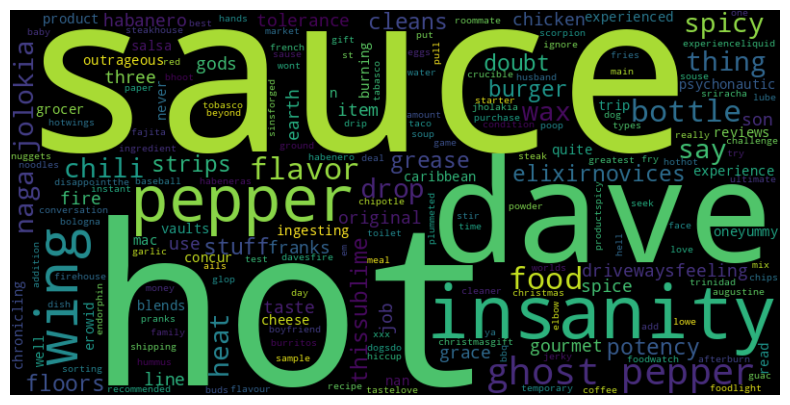

In [ ]:
# DataFrame containing positive sentiment words and their entities
positive_df = prod1_df[prod1_df['Sentiment'] == 'Positive']

# Filter positive entities from the DataFrame
positive_entities = positive_df['Entity'][positive_df['Entity'] != 'nan']

# Convert entities to strings and remove any NaN values
positive_entities = positive_entities.astype(str).dropna()

# Remove duplicates from the positive entities
positive_entities = positive_entities.drop_duplicates()

# Join all positive entities into a single string
positive_text = ' '.join(positive_entities)

# Generate word cloud
wordcloud = WordCloud(width=800, height=400, background_color='black').generate(positive_text)

# Plot the word cloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

### Positive Words

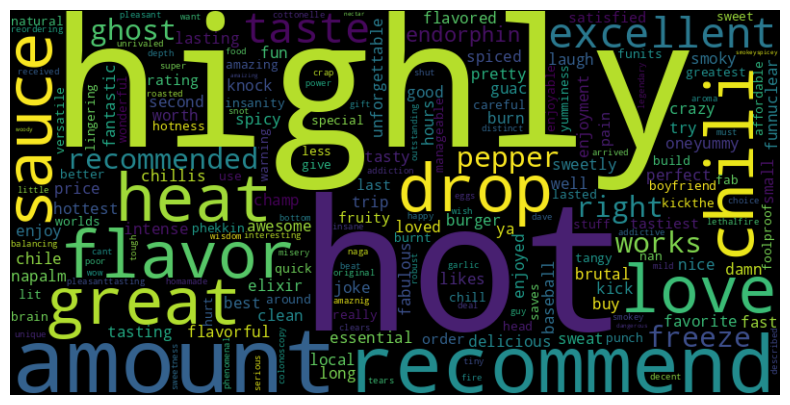

In [ ]:
# DataFrame containing positive sentiment words and their word
positive_df = prod1_df[prod1_df['Sentiment'] == 'Positive']

# Filter positive word from the DataFrame
positive_word = positive_df['Word']

# Convert word to strings and remove any NaN values
positive_word = positive_word.astype(str).dropna()

# Remove duplicates from the positive word
positive_word = positive_word.drop_duplicates()

# Join all positive word into a single string
positive_text = ' '.join(positive_word)

# Generate word cloud
wordcloud = WordCloud(width=800, height=400, background_color='black').generate(positive_text)

# Plot the word cloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

### Negative Entities

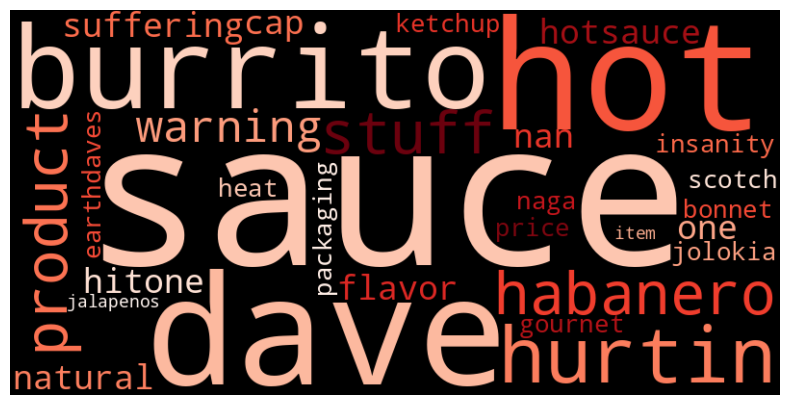

In [ ]:
# DataFrame containing negative sentiment words and their entities
negative_df = prod1_df[prod1_df['Sentiment'] == 'Negative']

# Filter negative entities from the DataFrame
negative_entities = negative_df['Entity'][negative_df['Entity'] != 'nan']

# Convert entities to strings and remove any NaN values
negative_entities = negative_entities.astype(str).dropna()

# Remove duplicates from the negative entities
negative_entities = negative_entities.drop_duplicates()

# Join all negative entities into a single string
negative_text = ' '.join(negative_entities)

# Generate word cloud for negative sentiment
wordcloud = WordCloud(width=800, height=400, background_color='black', colormap='Reds').generate(negative_text)

# Plot the word cloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

### Negative Words

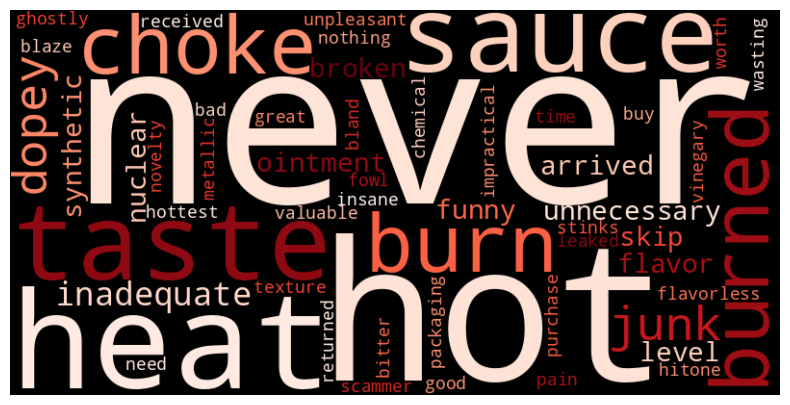

In [ ]:
# Filter DataFrame to get negative sentiment words
negative_df = prod1_df[prod1_df['Sentiment'] == 'Negative']

# Extract negative entities from the DataFrame
negative_entities = negative_df['Word']

# Convert entities to strings and remove any NaN values
negative_entities = negative_entities.astype(str).dropna()

# Remove duplicates from the negative entities
negative_entities = negative_entities.drop_duplicates()

# Join all negative entities into a single string
negative_text = ' '.join(negative_entities)

# Generate word cloud for negative sentiment with red colormap
wordcloud = WordCloud(width=800, height=400, background_color='black', colormap='Reds').generate(negative_text)

# Plot the word cloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

## Japanese Kit Kat Maccha Green Tea Flavor

### Positive Entities

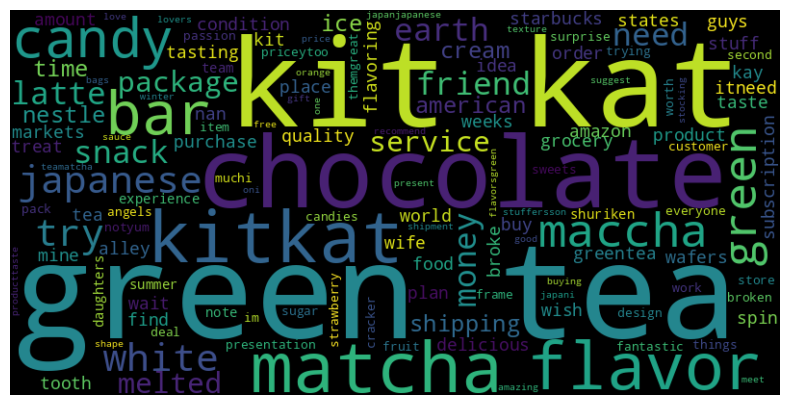

In [ ]:
# DataFrame containing positive sentiment words and their entities
positive_df = prod2_df[prod2_df['Sentiment'] == 'Positive']

# Filter positive entities from the DataFrame
positive_entities = positive_df['Entity'][positive_df['Entity'] != 'nan']

# Convert entities to strings and remove any NaN values
positive_entities = positive_entities.astype(str).dropna()

# Remove duplicates from the positive entities
positive_entities = positive_entities.drop_duplicates()

# Join all positive entities into a single string
positive_text = ' '.join(positive_entities)

# Generate word cloud
wordcloud = WordCloud(width=800, height=400, background_color='black').generate(positive_text)

# Plot the word cloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

### Positive Words

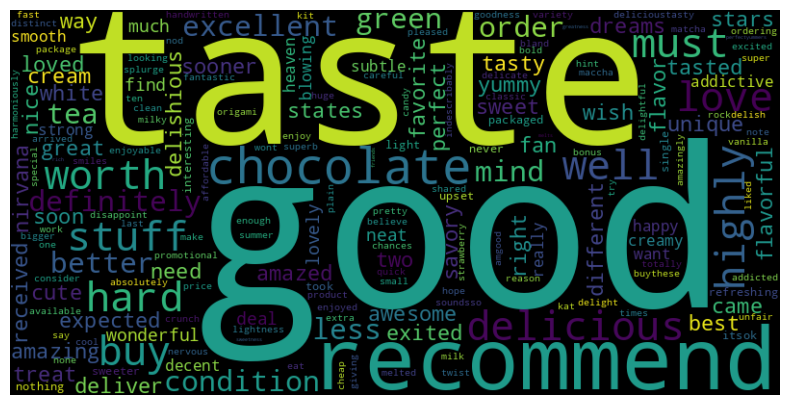

In [ ]:
# DataFrame containing positive sentiment words and their word
positive_df = prod2_df[prod2_df['Sentiment'] == 'Positive']

# Filter positive word from the DataFrame
positive_word = positive_df['Word']

# Convert word to strings and remove any NaN values
positive_word = positive_word.astype(str).dropna()

# Remove duplicates from the positive word
positive_word = positive_word.drop_duplicates()

# Join all positive word into a single string
positive_text = ' '.join(positive_word)

# Generate word cloud
wordcloud = WordCloud(width=800, height=400, background_color='black').generate(positive_text)

# Plot the word cloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

### Negative Entities

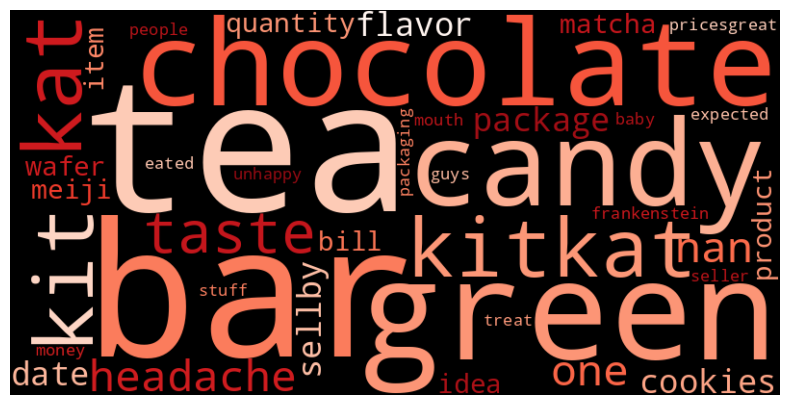

In [ ]:
# DataFrame containing negative sentiment words and their entities
negative_df = prod2_df[prod2_df['Sentiment'] == 'Negative']

# Filter negative entities from the DataFrame
negative_entities = negative_df['Entity'][negative_df['Entity'] != 'nan']

# Convert entities to strings and remove any NaN values
negative_entities = negative_entities.astype(str).dropna()

# Remove duplicates from the negative entities
negative_entities = negative_entities.drop_duplicates()

# Join all negative entities into a single string
negative_text = ' '.join(negative_entities)

# Generate word cloud for negative sentiment
wordcloud = WordCloud(width=800, height=400, background_color='black', colormap='Reds').generate(negative_text)

# Plot the word cloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

### Negative Words

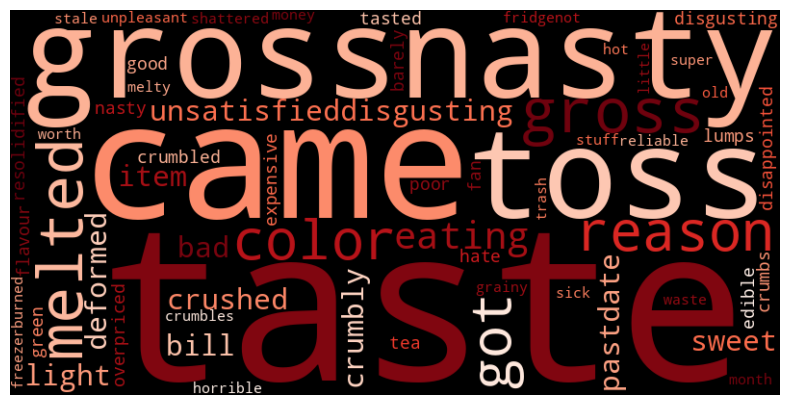

In [ ]:
# DataFrame containing negative sentiment words and their entities
negative_df = prod2_df[prod2_df['Sentiment'] == 'Negative']

# Filter negative entities from the DataFrame
negative_entities = negative_df['Word']

# Convert entities to strings and remove any NaN values
negative_entities = negative_entities.astype(str).dropna()

# Remove duplicates from the negative entities
negative_entities = negative_entities.drop_duplicates()

# Join all negative entities into a single string
negative_text = ' '.join(negative_entities)

# Generate word cloud for negative sentiment
wordcloud = WordCloud(width=800, height=400, background_color='black', colormap='Reds').generate(negative_text)

# Plot the word cloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

## Orbit Cinnamon Sugarfree Gum

### Positive Entities

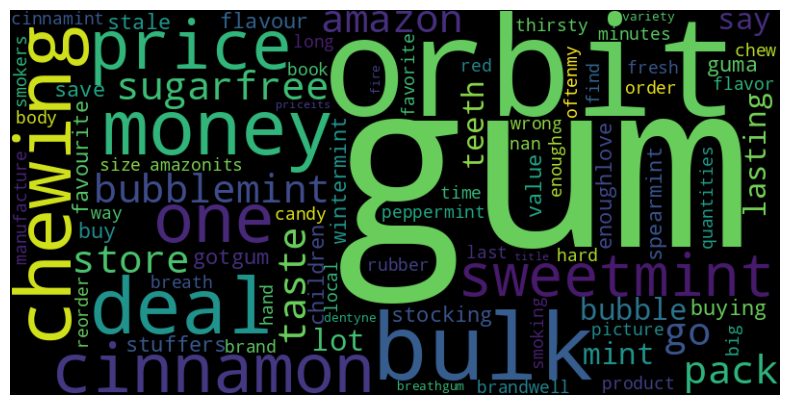

In [ ]:
# DataFrame containing positive sentiment words and their entities
positive_df = prod3_df[prod3_df['Sentiment'] == 'Positive']

# Filter positive entities from the DataFrame
positive_entities = positive_df['Entity'][positive_df['Entity'] != 'nan']

# Convert entities to strings and remove any NaN values
positive_entities = positive_entities.astype(str).dropna()

# Remove duplicates from the positive entities
positive_entities = positive_entities.drop_duplicates()

# Join all positive entities into a single string
positive_text = ' '.join(positive_entities)

# Generate word cloud
wordcloud = WordCloud(width=800, height=400, background_color='black').generate(positive_text)

# Plot the word cloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

### Positive Words

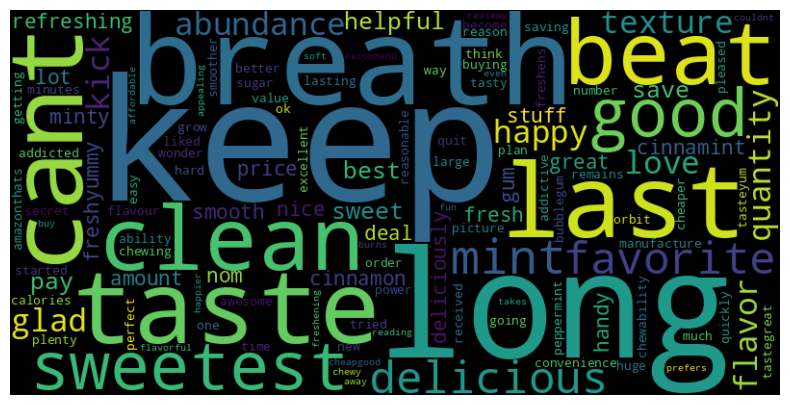

In [ ]:
# DataFrame containing positive sentiment words and their word
positive_df = prod3_df[prod3_df['Sentiment'] == 'Positive']

# Filter positive word from the DataFrame
positive_word = positive_df['Word']

# Convert word to strings and remove any NaN values
positive_word = positive_word.astype(str).dropna()

# Remove duplicates from the positive word
positive_word = positive_word.drop_duplicates()

# Join all positive word into a single string
positive_text = ' '.join(positive_word)

# Generate word cloud
wordcloud = WordCloud(width=800, height=400, background_color='black').generate(positive_text)

# Plot the word cloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

### Negative Entities

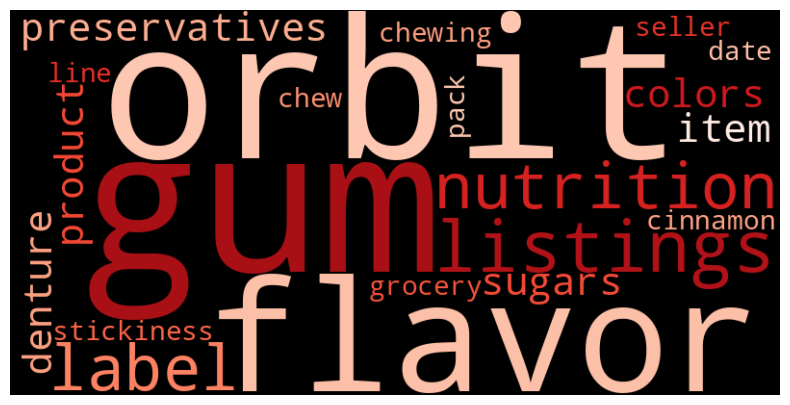

In [ ]:
# DataFrame containing negative sentiment words and their entities
negative_df = prod3_df[prod3_df['Sentiment'] == 'Negative']

# Filter negative entities from the DataFrame
negative_entities = negative_df['Entity'][negative_df['Entity'] != 'nan']

# Convert entities to strings and remove any NaN values
negative_entities = negative_entities.astype(str).dropna()

# Remove duplicates from the negative entities
negative_entities = negative_entities.drop_duplicates()

# Join all negative entities into a single string
negative_text = ' '.join(negative_entities)

# Generate word cloud for negative sentiment
wordcloud = WordCloud(width=800, height=400, background_color='black', colormap='Reds').generate(negative_text)

# Plot the word cloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

### Negative Words

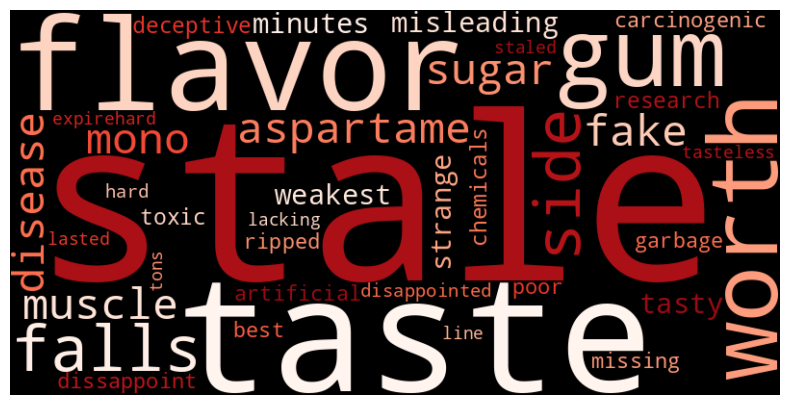

In [ ]:
# DataFrame containing negative sentiment words and their entities
negative_df = prod3_df[prod3_df['Sentiment'] == 'Negative']

# Filter negative entities from the DataFrame
negative_entities = negative_df['Word']

# Convert entities to strings and remove any NaN values
negative_entities = negative_entities.astype(str).dropna()

# Remove duplicates from the negative entities
negative_entities = negative_entities.drop_duplicates()

# Join all negative entities into a single string
negative_text = ' '.join(negative_entities)

# Generate word cloud for negative sentiment
wordcloud = WordCloud(width=800, height=400, background_color='black', colormap='Reds').generate(negative_text)

# Plot the word cloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()